In [83]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, Aer
from qiskit.visualization import array_to_latex

In [84]:
simulator = Aer.get_backend('aer_simulator')

In [85]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.h(qr[0])
qc.cx(qr[0],qr[1])

In [86]:
qc.save_statevector()
qobj = assemble(qc)
result = simulator.run(qobj).result()

In [87]:
final_state = result.get_statevector()
array_to_latex(final_state,prefix = "\\text{Statevector = }")

<IPython.core.display.Latex object>

In [88]:
from math import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_bloch_multivector

In [89]:
simulatort = Aer.get_backend('aer_simulator')

In [90]:
qr = QuantumRegister(1)
qc = QuantumCircuit(qr)
qc.x(qr[0])

In [91]:
#function defination block
def qft_rotations(qc,n):
    if n == 0:
        return qc
    n-=1
    qc.h(n)
    for qubit in range(n):
        qc.cp(pi/2**(n-qubit),qubit,n)
    qft_rotations(qc,n)
    
def inv_qft_rot(qc, n):
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(-pi/2**(n-qubit),qubit,n)
    inv_qft
        
    
def swap_registers(qc,n):
    for qubit in range (n//2):
        qc.swap(qubit, n-qubit-1)
    return qc
    
def qft(qc,n):
    qft_rotations(qc,n)
    swap_registers(qc,n)
    return qc

def inv_qft(qc, n):
    inv_qft_rot(qc,n)
    swap_registers(qc, n)
    return qc

def get_sv_for_bloch(qc):
    qc_copy = qc.copy()
    qc_copy.save_statevector()
    statevector = simulator.run(qc_copy).result().get_statevector()
    return statevector

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


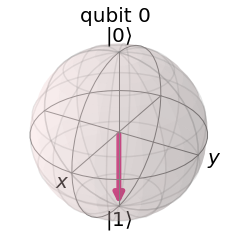

In [92]:
init_sv = get_sv_for_bloch(qc)
plot_bloch_multivector(init_sv)


In [93]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, Aer
from math import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_bloch_multivector

In [94]:
simulator = Aer.get_backend('aer_simulator')

In [95]:
#get input from user

num = input("Enter the number:")
n = len(num)
qreg = QuantumRegister(n)
creg = ClassicalRegister(n)
qc = QuantumCircuit(qreg, creg)

Enter the number: 111


In [96]:
#prepare the circuit 

for iter,one in enumerate (reversed(num)):
    if one =='1':
        qc.x(qreg[iter])
        

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


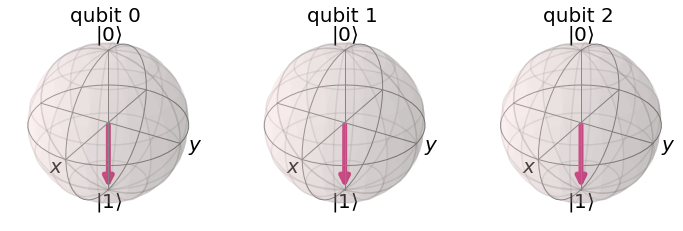

In [97]:
#initial bloch sphere representation
init_sv = get_sv_for_bloch(qc)
plot_bloch_multivector(init_sv)

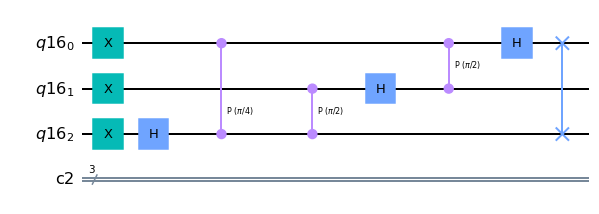

In [98]:
#perform qft 

qft(qc,n)
qc.draw()

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


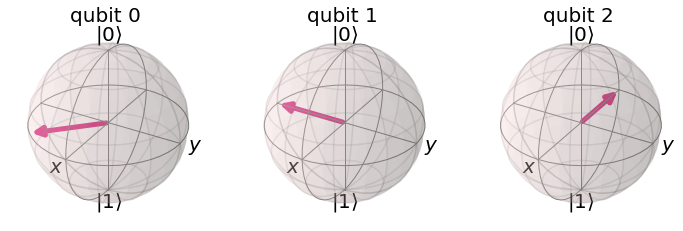

In [99]:
#bloch sphere representation after QFT
sv_after_qft = get_sv_for_bloch(qc)
plot_bloch_multivector(sv_after_qft)

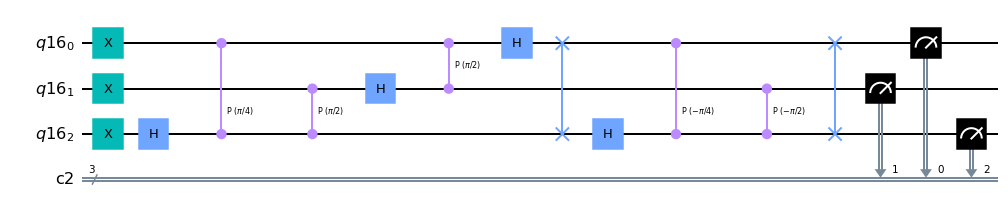

In [100]:
#perform Qft

inv_qft(qc,n)
qc.measure(qreg, creg)
qc.draw()

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


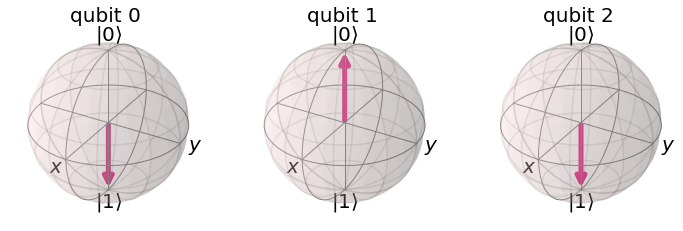

In [101]:
#block sphere representation after IQFT

sv_after_iqft = get_sv_for_bloch(qc)
plot_bloch_multivector(sv_after_iqft)

In [ ]:
-----------QUANTUM PHASE ESTIMATION-------------

In [ ]:
#for quantum phase estimation

In [118]:
#QFT-dagger preparation

def inv_qft(qc, n):
    for qubit in range(n//2):
                        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)),m,j)
        qc.h(j)

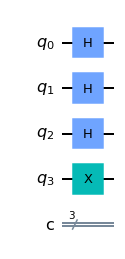

In [119]:
#initial phase preparation

qpe = QuantumCircuit(4, 3)
qpe.x(3)
for qubit in range(3):
    qpe.h(qubit)
qpe.draw()

In [148]:
#apply the cy rotation
import math

reps =1
for counting_qubits in range(3):
    for i in range(reps):
        qpe.cp(math.pi//2, counting_qubit, 3)
    reps *= 2

qbe.barrier()
qbe.draw()


Traceback (most recent call last):
  File "/tmp/ipykernel_60/1647858878.py", line 10, in <module>
    qbe.barrier()
NameError: name 'qbe' is not defined

Use %tb to get the full traceback.


In [131]:
#apply Qft -Dagger

inv_qft(qpe, 3)
qpe.barrier()

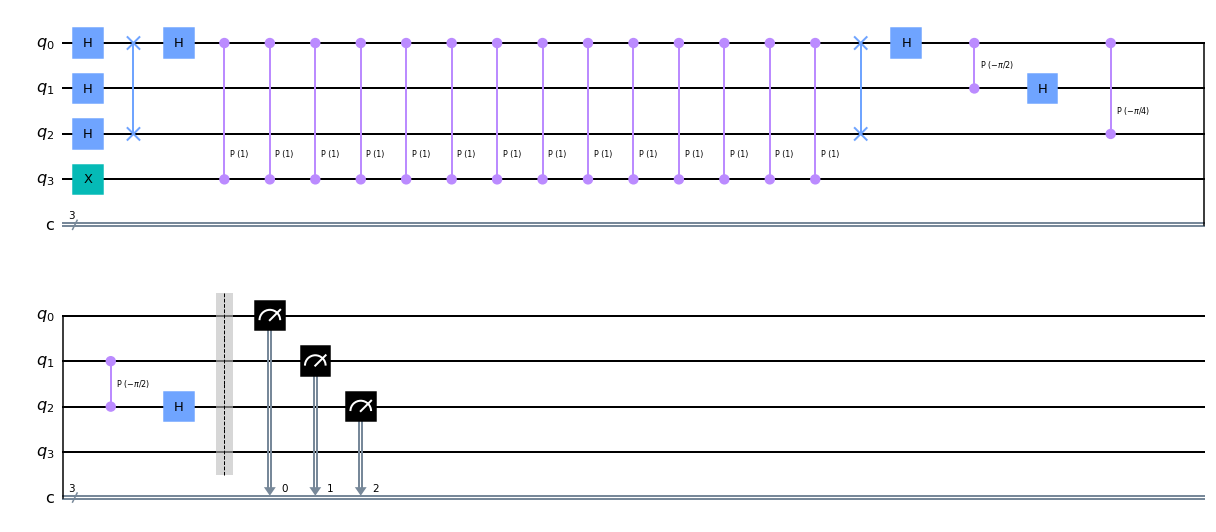

In [132]:
for n in range(3):
    qpe.measure(n, n)
    
qpe.draw()


In [135]:
simulator = Aer.get_backend('aer_simulator')
qobj = assemble(qpe, shots = 2048)
results = simulator.run(qobj).result()
answer = results

/opt/conda/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


In [ ]:
-------------------SHOR'S ALGORITHM------------------

In [138]:
from qiskit.aqua.algorithms import Shor
from qiskit.aqua import QuantumInstance
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_histogram

In [139]:
backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots = 1000)
my_shor = Shor(N = 15, a = 2 , quantum_instance = quantum_instance)
Shor.run(my_shor)

/opt/conda/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


{'factors': [[3, 5]], 'total_counts': 64, 'successful_counts': 21}

In [140]:
def c_amod15(a, power):
    U = QuantumCircuit(4)
    for iteration in range(power):
        U.swap(2, 3)
        U.swap(1, 2)
        U.swap(0, 1)
        for q in range(4):
            U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15"%(a, power)
    c_U = U.control
    return c_U

In [141]:
n_count = 0
a = 7

In [142]:
def qft_dagger(n):
    qc = QuantumCircuit(n)
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cul(-np.pi/float(2**(j-m),m,j))
        qc.h(j)
    qc.name= "QFT dagger"
    return qc

In [144]:
qc = QuantumCircuit(n_count +4, n_count)

for q in range(n_count):
    qc.h(q)
    
qc.x(3+n_count)

for q in range(n_count):
    qc.append(c_amod15(a, 2**q),[q]+[i+n_count for i in range(4)])
    
qc.append(qft_dagger(n_count, range(n_count)))
qc.measure(range(n_count, range(n_count)))
    
    
qc.draw()

Traceback (most recent call last):
  File "/tmp/ipykernel_60/1307102416.py", line 1, in <module>
    qc = QuantumCircuit(n_count +4, n_count)
  File "/opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py", line 195, in __init__
    self.add_register(*regs)
  File "/opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py", line 1167, in add_register
    regs = (QuantumRegister(regs[0], "q"), ClassicalRegister(regs[1], "c"))
  File "/opt/conda/lib/python3.8/site-packages/qiskit/circuit/register.py", line 86, in __init__
    raise CircuitError(
CircuitError: "Register size must be positive (int '0' was provided)"

Use %tb to get the full traceback.
